In [1]:
# Programa de ejemplo de lectura de datos y aplicación de bias correction para un seminario introductorio a BC
# Ana Casanueva, 20.03.24
rm(list=ls())
graphics.off()
library(loadeR) # para leer datos (función loadGridData)
library(visualizeR) # para generar figuras (función spatialPlot)
library(downscaleR) # para bias correction (función biasCorrection)
library(transformeR) # para transformaciones, p.ej. subset (subsetDimension, subsetGrid), interpolar (interpGrid), etc.
library(climate4R.indices) # para calcular índices

# Inventario con lista de datasets disponibles
df <- read.csv("../Data_AEMET/inventory.csv")

Warning message:
"package 'loadeR' was built under R version 3.6.3"Loading required package: rJava
Warning message:
"package 'rJava' was built under R version 3.6.3"Loading required package: loadeR.java
Warning message:
"package 'loadeR.java' was built under R version 3.6.3"Java version 21x amd64 by Azul Systems, Inc. detected
NetCDF Java Library v4.6.0-SNAPSHOT (23 Apr 2015) loaded and ready
Loading required package: climate4R.UDG
Warning message:
"package 'climate4R.UDG' was built under R version 3.6.3"climate4R.UDG version 0.2.6 (2023-06-26) is loaded
Please use 'citation("climate4R.UDG")' to cite this package.
loadeR version 1.8.1 (2023-06-22) is loaded
Please use 'citation("loadeR")' to cite this package.
Warning message:
"package 'visualizeR' was built under R version 3.6.3"Loading required package: transformeR
Warning message:
"package 'transformeR' was built under R version 3.6.3"


    _______   ____  ___________________  __  ________ 
   / ___/ /  / /  |/  / __  /_  __/ __/ / / / / __  / 
  / /  / /  / / /|_/ / /_/ / / / / __/ / /_/ / /_/_/  
 / /__/ /__/ / /  / / __  / / / / /__ /___  / / \ \ 
 \___/____/_/_/  /_/_/ /_/ /_/  \___/    /_/\/   \_\ 
 
      github.com/SantanderMetGroup/climate4R



transformeR version 2.2.2 (2023-10-26) is loaded
Please see 'citation("transformeR")' to cite this package.
visualizeR version 1.6.4 (2023-10-26) is loaded
Please see 'citation("visualizeR")' to cite this package.
Warning message:
"package 'downscaleR' was built under R version 3.6.3"downscaleR version 3.3.4 (2023-06-22) is loaded
Please use 'citation("downscaleR")' to cite this package.
Warning message:
"package 'climate4R.indices' was built under R version 3.6.3"climate4R.indices version 0.3.1 (2023-06-22) is loaded
Use 'indexShow()' for an overview of the available climate indices and circIndexShow() for the circulation indices.
NOTE: use package climate4R.climdex to calculate ETCCDI indices.

Attaching package: 'climate4R.indices'

The following object is masked from 'package:transformeR':

    lambWT



In [2]:
#############################
# *** Leer observaciones ****
#############################
obs.subset <- subset(df, activity == 'W5E5')
obs.loc <- as.character(obs.subset$location)
di.obs <- dataInventory(obs.loc)
obs.data <- loadGridData(obs.loc, var="tasmax", years= 1986:2005,lonLim =c(-10, 5), latLim = c(35,44))

[2024-04-23 11:37:49] Doing inventory ...
[2024-04-23 11:37:49] Opening dataset...
[2024-04-23 11:37:51] The dataset was successfuly opened
[2024-04-23 11:37:52] Retrieving info for 'hurs' (11 vars remaining)
[2024-04-23 11:37:53] Retrieving info for 'huss' (10 vars remaining)
[2024-04-23 11:37:53] Retrieving info for 'prsn' (9 vars remaining)
[2024-04-23 11:37:53] Retrieving info for 'psl' (8 vars remaining)
[2024-04-23 11:37:53] Retrieving info for 'ps' (7 vars remaining)
[2024-04-23 11:37:53] Retrieving info for 'rlds' (6 vars remaining)
[2024-04-23 11:37:53] Retrieving info for 'rsds' (5 vars remaining)
[2024-04-23 11:37:53] Retrieving info for 'sfcWind' (4 vars remaining)
[2024-04-23 11:37:53] Retrieving info for 'tasmax' (3 vars remaining)
[2024-04-23 11:37:53] Retrieving info for 'tas' (2 vars remaining)
[2024-04-23 11:37:53] Retrieving info for 'tasmin' (1 vars remaining)
[2024-04-23 11:37:53] Retrieving info for 'pr' (0 vars remaining)
[2024-04-23 11:37:53] Done.
[2024-04-23 1

[2024-04-23 11:39:20] - Computing climatology...
[2024-04-23 11:39:20] - Done.


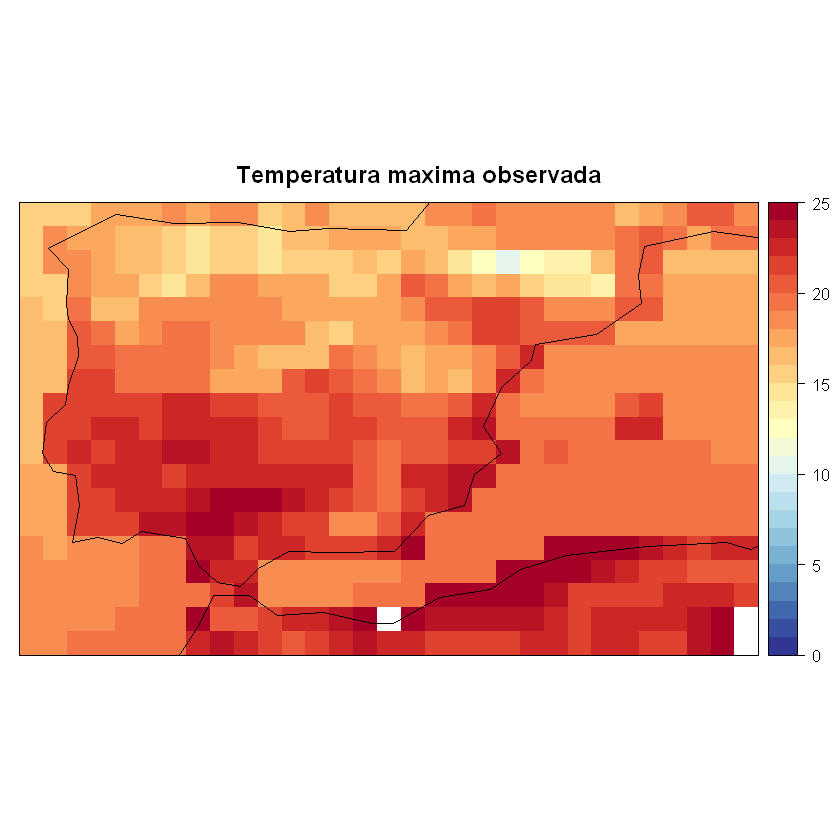

In [3]:
spatialPlot(climatology(obs.data), backdrop.theme = "coastline", rev.colors = TRUE, at= seq(0,25), 
            main= "Temperatura maxima observada")

In [4]:
#########################
# *** Leer un modelo ****
#########################
rcm.hist.subset <- subset(df, activity == 'CORDEX' & domain=='EUR-44' & experiment == 'historical' & variable=='tasmax' & rcm =='RACMO22E' & model == 'ICHEC-EC-EARTH' & ensemble == 'r1i1p1') 
rcm.hist.loc <- as.character(rcm.hist.subset $location)
hist.data <- loadGridData(rcm.hist.loc, var="tasmax", years= 1986:2005,lonLim =c(-10, 5), latLim = c(35,44))
# Comprobar las unidades de los datos
message("model units ",getGridUnits(hist.data)) # degC para temperaturas, mm ó kg*m-2 para precipitación
# Pasar a grados Celsius
hist.data <- gridArithmetics(hist.data, 273.15, operator="-")

[2024-04-23 11:39:25] Opening dataset...
[2024-04-23 11:39:26] The dataset was successfuly opened
[2024-04-23 11:39:26] Defining geo-location parameters
[2024-04-23 11:39:28] Defining time selection parameters
[2024-04-23 11:39:28] Retrieving data subset ...
[2024-04-23 11:39:51] Done
model units K


[2024-04-23 11:39:55] - Computing climatology...
[2024-04-23 11:39:56] - Done.


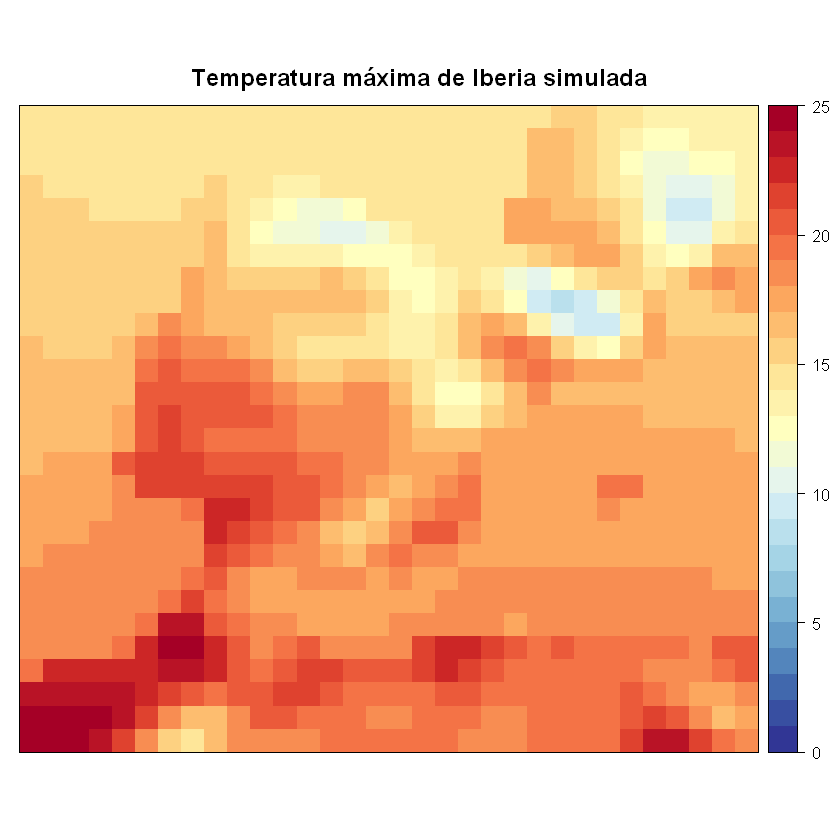

In [5]:
spatialPlot(climatology(hist.data) , backdrop.theme = "coastline", rev.colors = TRUE,  at= seq(0,25),
            main= "Temperatura máxima de Iberia simulada") # lo pinta en el Ecuador, donde está centrada la malla regular del modelo

In [6]:
##############################################
# *** Aplicar máscara de tierra al modelo ****
##############################################
rcm.mask <- subset(df, activity == 'CORDEX' & domain=='EUR-44' & experiment == 'historical' & variable=='sftlf' & rcm =='RACMO22E' & model == 'ICHEC-EC-EARTH' & ensemble == 'r1i1p1') 
rcm.mask.loc <- as.character(rcm.mask$location)
rcm.mask <- loadGridData(rcm.mask.loc, var="sftlf", lonLim =c(-10, 5), latLim = c(35,44))
# En este modelo, valores entre 0 y 100 de land area fraction, establecemos un umbral para decir qué es tierra y qué es mar

[2024-04-23 11:39:58] Opening dataset...
[2024-04-23 11:39:58] The dataset was successfuly opened
[2024-04-23 11:39:58] Defining geo-location parameters
[2024-04-23 11:39:59] Defining time selection parameters
NOTE: Undefined Dataset Time Axis (static variable)
[2024-04-23 11:39:59] Retrieving data subset ...
[2024-04-23 11:39:59] Done


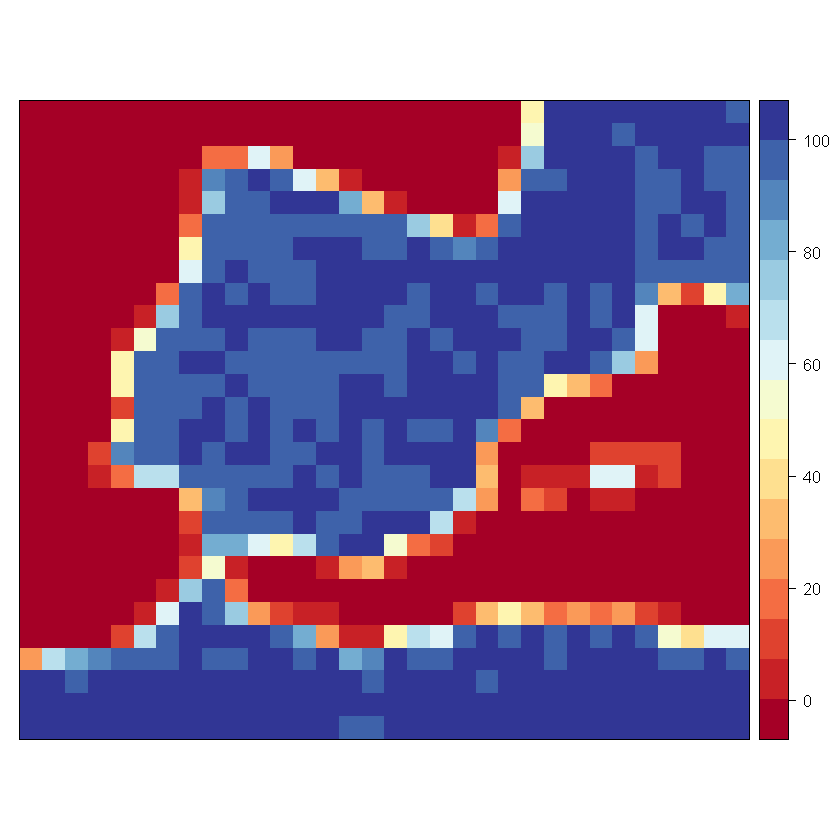

In [7]:
spatialPlot(rcm.mask) # porcentaje de tierra de cada pixel

In [8]:
rcm.mask$Data[rcm.mask$Data < 40] <- NA
rcm.mask$Data[rcm.mask$Data >= 40] <- 1 # OJO! puede que en el algún modelo venga en tanto por 1 en lugar de %. Adaptar.

# qsub -I -q himem -l mem=100Gb

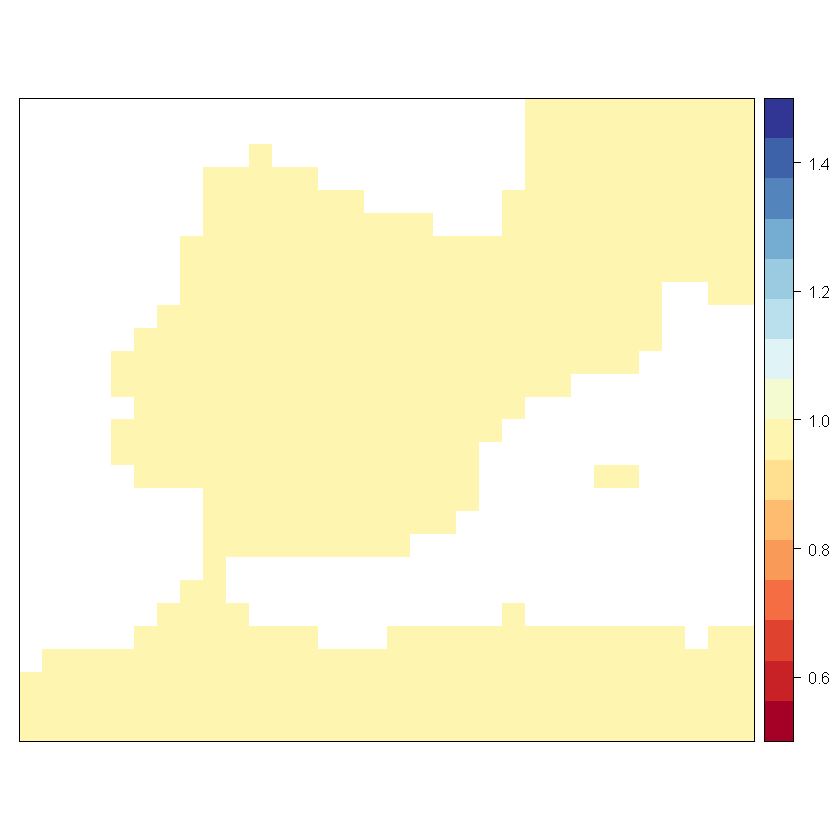

In [9]:
spatialPlot(rcm.mask) # 1's en tierra, NA's en mar

In [10]:
# Multiplicamos los datos del modelo por su máscara tierra-mar. Pondrá NA en los puntos de mar.
# Se hace una multiplicación día a día de los datos del modelo por la máscara.
time <- getRefDates(hist.data)
nt <- length(time)
ls <-lapply(1:nt, function(i){
  timei <-subsetDimension(hist.data, dimension = "time", indices=i) # separa día a día 
  gridArithmetics(timei, rcm.mask, operator = "*") # multiplica los dos grids
}
)
rcm.hist.masked <- bindGrid(ls, dimension = "time") # bindGrid es una función de transforeR que vuelve a unir todos los días en un grid de climate4R
rm(hist.data, ls, rcm.mask)

[2024-04-23 11:40:44] - Computing climatology...
[2024-04-23 11:40:44] - Done.


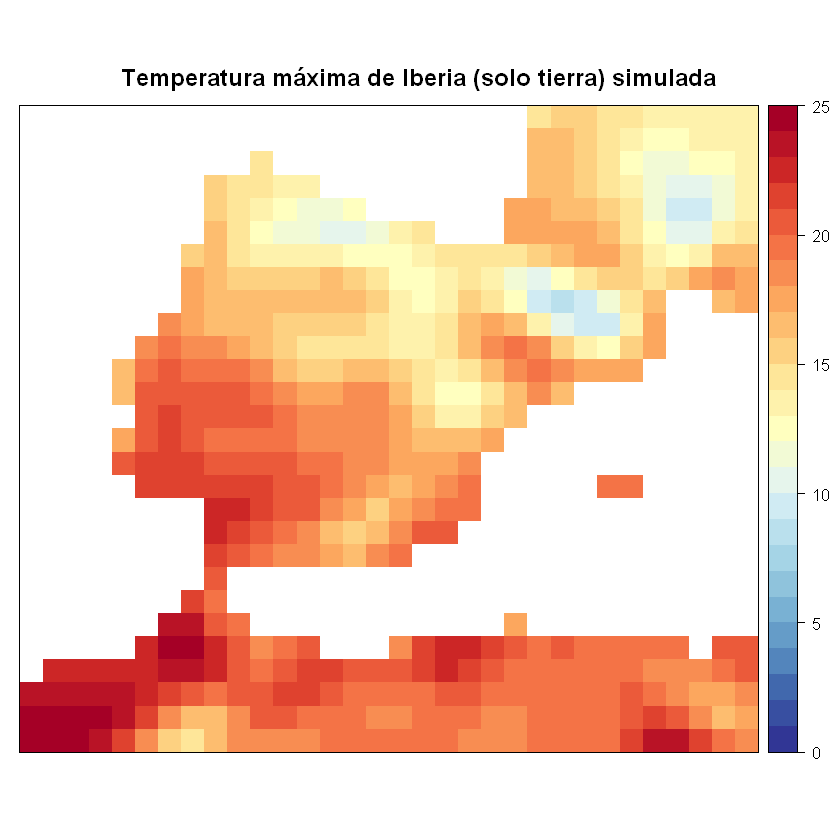

In [11]:
spatialPlot(climatology(rcm.hist.masked) , backdrop.theme = "coastline", rev.colors = TRUE,  
            at= seq(0,25), main= "Temperatura máxima de Iberia (solo tierra) simulada")# lo pinta en el Ecuador, donde está centrada la malla regular del modelo

In [12]:
############################################################
# *** Interpolar el modelo a la malla de la observación ****
############################################################
# Este paso lo hace automáticamente biasCorrection, pero lo hago aquí para representar el modelo en la misma malla que la observación y calcular el sesgo (bias)
rcm.hist.interp <- interpGrid(rcm.hist.masked, new.coordinates = getGrid(obs.data))

[2024-04-23 11:40:44] Calculating nearest neighbors...
[2024-04-23 11:40:44] Performing nearest interpolation... may take a while
[2024-04-23 11:40:45] Done


[2024-04-23 11:41:16] - Computing climatology...
[2024-04-23 11:41:16] - Done.
[2024-04-23 11:41:16] - Computing climatology...
[2024-04-23 11:41:16] - Done.


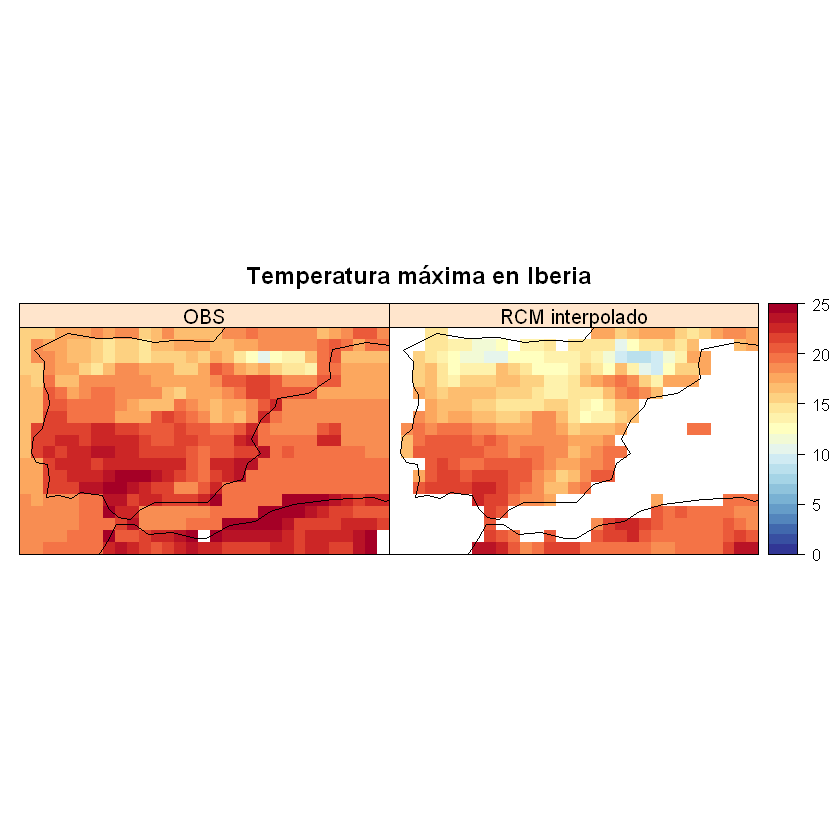

In [13]:
spatialPlot(makeMultiGrid(climatology(obs.data),climatology(rcm.hist.interp)) , backdrop.theme = "coastline", 
            rev.colors = TRUE,  at= seq(0,25), main= "Temperatura máxima en Iberia", as.table=TRUE, 
            names.attr=c("OBS", "RCM interpolado"), layout=c(2,1)) # pinta ambos en las latitudes que tocan

In [14]:
##########################
# *** Bias correction ****
##########################
bc.scaling.hist <- biasCorrection(y=obs.data, x=rcm.hist.interp, newdata= rcm.hist.interp, precipitation = FALSE, 
                             method="scaling", scaling.type="additive" ) # correción solo de la media (aditiva para temperatura)
bc.eqm.hist <- biasCorrection(y=obs.data, x=rcm.hist.interp, newdata= rcm.hist.interp, precipitation = FALSE, 
                         method="eqm", extrapolation = "constant", n.quantiles=99 )  # corrección de 99 percentiles

[2024-04-23 11:41:28] Trying to determine the time zone...
[2024-04-23 11:41:28] Time zone identified and set to GMT
See 'setGridDates.asPOSIXlt' to change the time zone


[2024-04-23 11:41:29] Already complete date record. Nothing was done
[2024-04-23 11:41:29] Trying to determine the time zone...
[2024-04-23 11:41:29] Time zone identified and set to GMT
See 'setGridDates.asPOSIXlt' to change the time zone
[2024-04-23 11:41:30] Already complete date record. Nothing was done
[2024-04-23 11:41:30] Trying to determine the time zone...
[2024-04-23 11:41:30] Time zone identified and set to GMT
See 'setGridDates.asPOSIXlt' to change the time zone
[2024-04-23 11:41:31] Already complete date record. Nothing was done
[2024-04-23 11:41:33] Argument precipitation is set as FALSE, please ensure that this matches your data.
[2024-04-23 11:41:35] Number of windows considered: 1...
[2024-04-23 11:41:35] Bias-correcting 1 members separately...
[2024-04-23 11:41:39] Done.
[2024-04-23 11:41:39] Trying to determine the time zone...
[2024-04-23 11:41:39] Time zone identified and set to GMT
See 'setGridDates.asPOSIXlt' to change the time zone
[2024-04-23 11:41:40] Already c

In [16]:
# Calcular el sesgo de los datos sin corregir (raw) y de las dos correcciones en la media
bias.raw.mean.hist <- gridArithmetics(climatology(rcm.hist.interp), climatology(obs.data), operator="-")
bias.scaling.mean.hist <- gridArithmetics(climatology(bc.scaling.hist), climatology(obs.data), operator="-")
bias.eqm.mean.hist <- gridArithmetics(climatology(bc.eqm.hist), climatology(obs.data), operator="-")

[2024-04-23 11:42:36] - Computing climatology...
[2024-04-23 11:42:36] - Done.
[2024-04-23 11:42:36] - Computing climatology...
[2024-04-23 11:42:36] - Done.
[2024-04-23 11:42:36] - Computing climatology...
[2024-04-23 11:42:36] - Done.
[2024-04-23 11:42:36] - Computing climatology...
[2024-04-23 11:42:37] - Done.
[2024-04-23 11:42:37] - Computing climatology...
[2024-04-23 11:42:37] - Done.
[2024-04-23 11:42:37] - Computing climatology...
[2024-04-23 11:42:37] - Done.


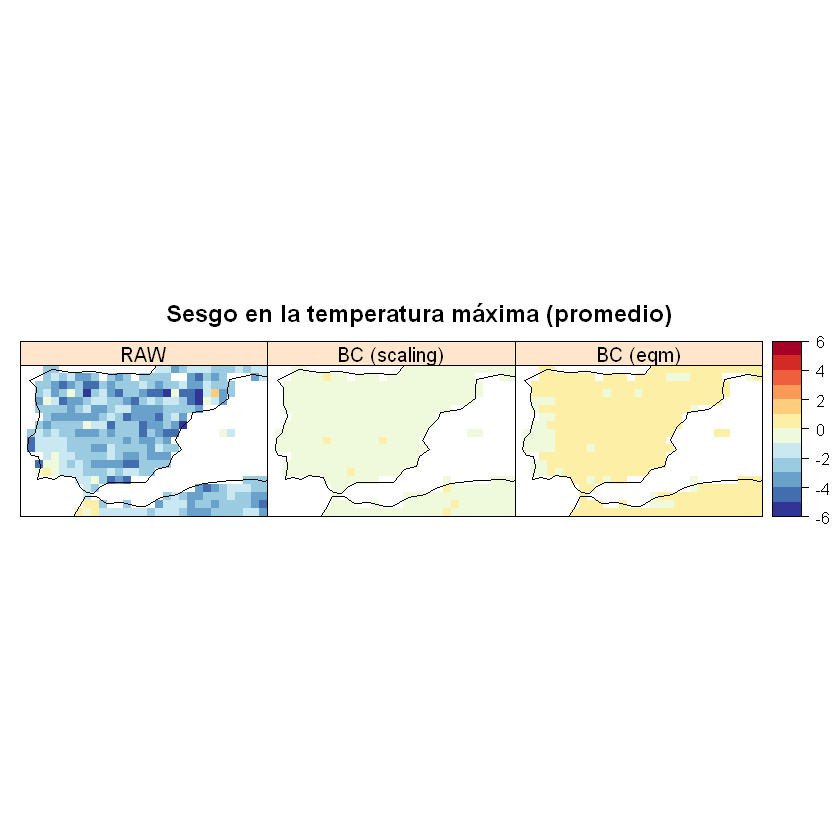

In [17]:
spatialPlot(makeMultiGrid(bias.raw.mean.hist, bias.scaling.mean.hist, bias.eqm.mean.hist), backdrop.theme = "coastline", 
            rev.colors = TRUE,  at= seq(-6,6), main= "Sesgo en la temperatura máxima (promedio)", layout=c(3,1),
            as.table=TRUE, names.attr=c("RAW", "BC (scaling)", "BC (eqm)"))

In [19]:
# calcular el sesgo de ambos en el número de días por encima de 35 grados, año a año
obs.tx35 <- indexGrid(tx = obs.data, time.resolution = "year", index.code = "TXth", th=35)
raw.tx35 <- indexGrid(tx = rcm.hist.interp, time.resolution = "year", index.code = "TXth", th=35)
# por alguna razón biasCorrection devuelve fechas en un formato distinto y no le gustan a indexGrid (hago un apaño)
bc.scaling$Dates <- rcm.hist.interp$Dates
bc.eqm$Dates <- rcm.hist.interp$Dates
bc.scaling.tx35 <- indexGrid(tx = bc.scaling, time.resolution = "year", index.code = "TXth", th=35)
bc.eqm.tx35 <- indexGrid(tx = bc.eqm, time.resolution = "year", index.code = "TXth", th=35)

[2024-04-15 11:12:04] Calculating TXth ...
[2024-04-15 11:12:04] Done
[2024-04-15 11:12:04] Calculating TXth ...
[2024-04-15 11:12:04] Done
[2024-04-15 11:12:05] Calculating TXth ...
[2024-04-15 11:12:05] Done
[2024-04-15 11:12:05] Calculating TXth ...
[2024-04-15 11:12:06] Done


In [20]:
bias.raw.tx35 <- gridArithmetics(climatology(raw.tx35), climatology(obs.tx35), operator="-")
bias.scaling.tx35 <- gridArithmetics(climatology(bc.scaling.tx35), climatology(obs.tx35), operator="-")
bias.eqm.tx35 <- gridArithmetics(climatology(bc.eqm.tx35), climatology(obs.tx35), operator="-")

[2024-04-15 11:12:06] - Computing climatology...


[2024-04-15 11:12:06] - Done.
[2024-04-15 11:12:06] - Computing climatology...
[2024-04-15 11:12:06] - Done.
[2024-04-15 11:12:06] - Computing climatology...
[2024-04-15 11:12:06] - Done.
[2024-04-15 11:12:06] - Computing climatology...
[2024-04-15 11:12:06] - Done.
[2024-04-15 11:12:06] - Computing climatology...
[2024-04-15 11:12:06] - Done.
[2024-04-15 11:12:06] - Computing climatology...
[2024-04-15 11:12:06] - Done.


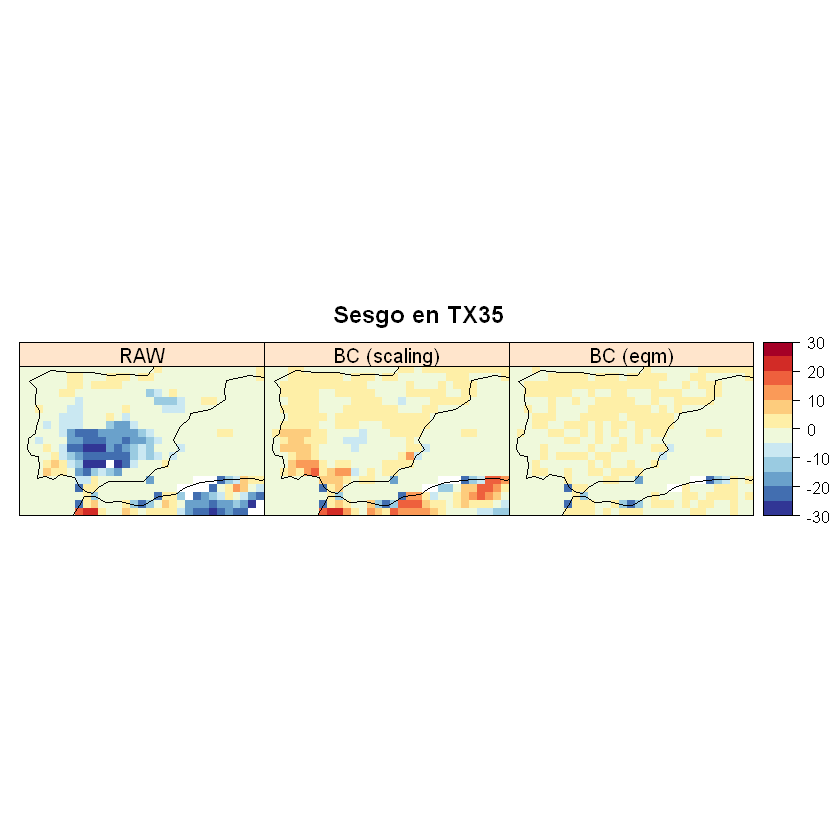

In [21]:
spatialPlot(makeMultiGrid(bias.raw.tx35, bias.scaling.tx35, bias.eqm.tx35), backdrop.theme = "coastline", 
            rev.colors = TRUE,  at= seq(-30,30,5), main= "Sesgo en TX35", layout=c(3,1),
            as.table=TRUE, names.attr=c("RAW", "BC (scaling)", "BC (eqm)"))

### ESCENARIO A FUTURO

In [18]:
###############################################
# *** Bias correction del escenario futuro ****
###############################################
# TAREA: Hacer lo mismo, pero esta vez aplicar la correción a las simulaciones de futuro (argumento newdata)
rcm.rcp85.subset <- subset(df, activity == 'CORDEX' & domain=='EUR-44' & experiment == 'rcp85' & variable=='tasmax' & rcm =='RACMO22E' & model == 'ICHEC-EC-EARTH' & ensemble == 'r1i1p1') 
rcm.rcp85.loc <- as.character(rcm.rcp85.subset $location)

In [19]:
rcp85.data <- loadGridData(rcm.rcp85.loc, var="tasmax", years= 2050:2080,lonLim =c(-10, 5), latLim = c(35,44))
# Comprobar las unidades de los datos
message("model units ",getGridUnits(rcp85.data)) # degC para temperaturas, mm ó kg*m-2 para precipitación
# Pasar a grados Celsius
rcp85.data <- gridArithmetics(rcp85.data, 273.15, operator="-")

[2024-04-23 11:44:08] Opening dataset...
[2024-04-23 11:44:11] The dataset was successfuly opened
[2024-04-23 11:44:11] Defining geo-location parameters
[2024-04-23 11:44:12] Defining time selection parameters
[2024-04-23 11:44:12] Retrieving data subset ...
[2024-04-23 11:44:43] Done
model units K


[2024-04-23 11:47:34] - Computing climatology...
[2024-04-23 11:47:34] - Done.


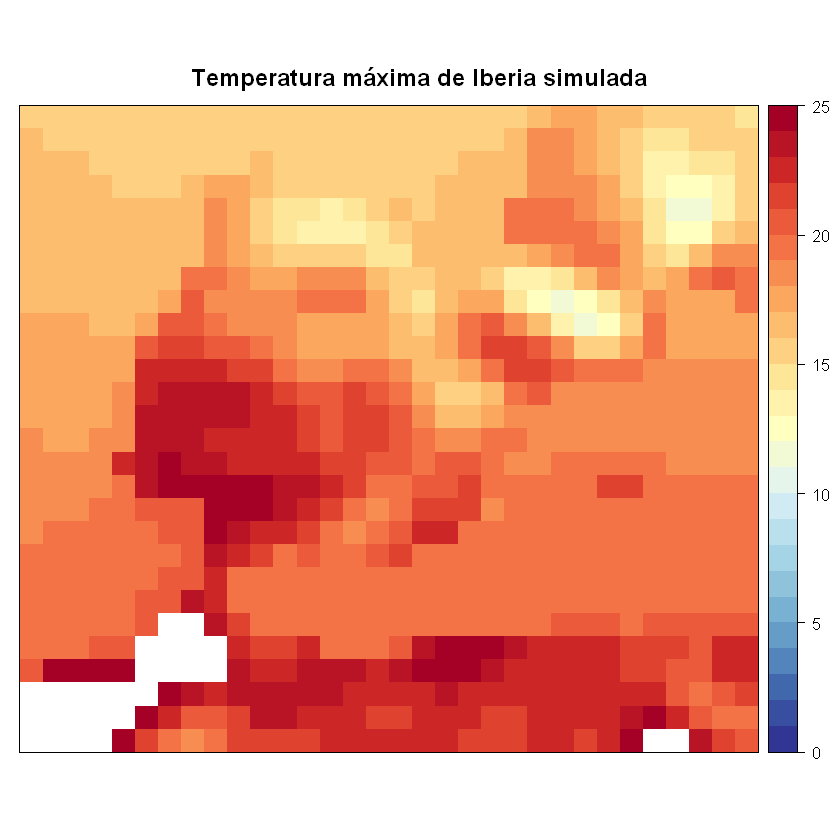

In [20]:
spatialPlot(climatology(rcp85.data) , backdrop.theme = "coastline", rev.colors = TRUE,  at= seq(0,25),
            main= "Temperatura máxima de Iberia simulada") # lo pinta en el Ecuador, donde está centrada la malla regular del modelo

In [21]:
##############################################
# *** Aplicar máscara de tierra al modelo ****
##############################################
rcm.mask <- subset(df, activity == 'CORDEX' & domain=='EUR-44' & experiment == 'rcp85' & variable=='sftlf' & rcm =='RACMO22E' & model == 'ICHEC-EC-EARTH' & ensemble == 'r1i1p1') 
rcm.mask.loc <- as.character(rcm.mask$location)
rcm.mask <- loadGridData(rcm.mask.loc, var="sftlf", lonLim =c(-10, 5), latLim = c(35,44))
# En este modelo, valores entre 0 y 100 de land area fraction, establecemos un umbral para decir qué es tierra y qué es mar

[2024-04-23 11:47:36] Opening dataset...
[2024-04-23 11:47:36] The dataset was successfuly opened
[2024-04-23 11:47:36] Defining geo-location parameters
[2024-04-23 11:47:37] Defining time selection parameters
NOTE: Undefined Dataset Time Axis (static variable)
[2024-04-23 11:47:37] Retrieving data subset ...
[2024-04-23 11:47:37] Done


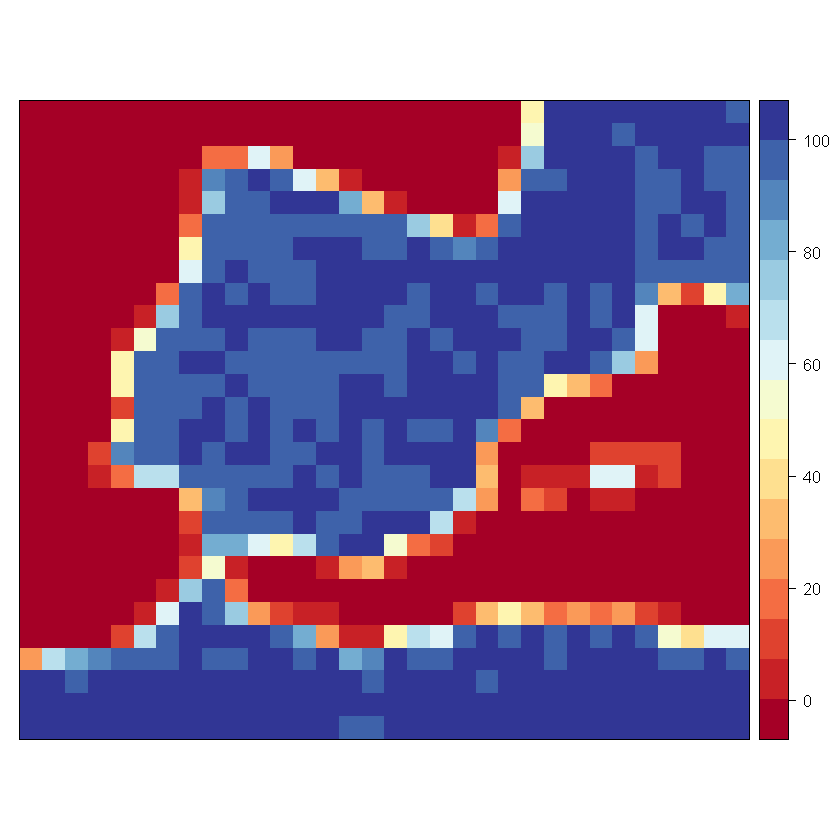

In [22]:
spatialPlot(rcm.mask) # porcentaje de tierra de cada pixel

In [23]:
rcm.mask$Data[rcm.mask$Data < 40] <- NA
rcm.mask$Data[rcm.mask$Data >= 40] <- 1 # OJO! puede que en el algún modelo venga en tanto por 1 en lugar de %. Adaptar.

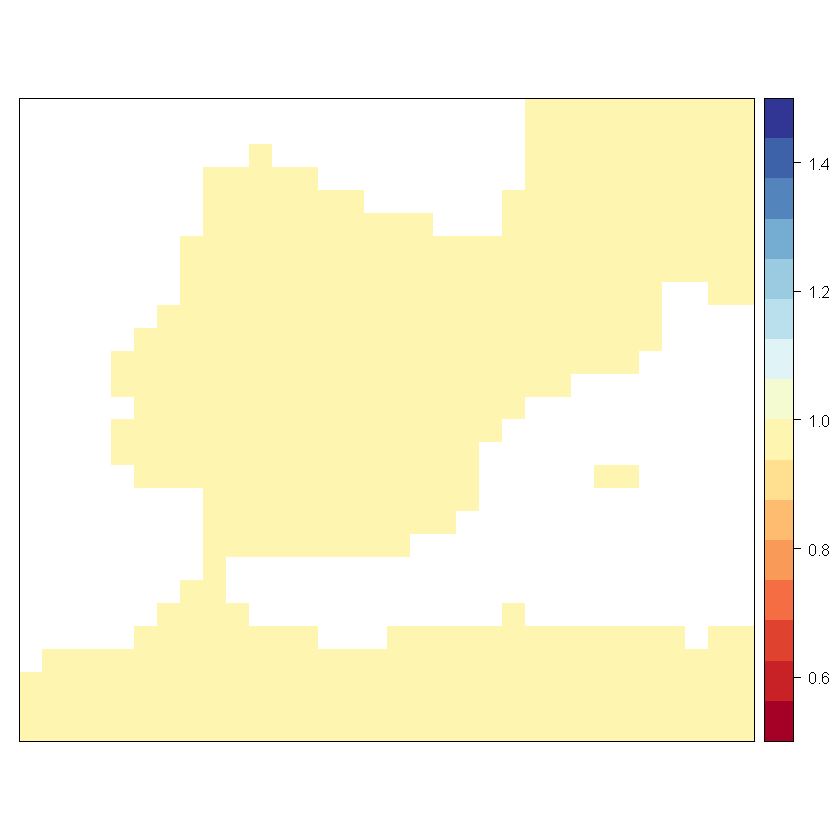

In [24]:
spatialPlot(rcm.mask) # 1's en tierra, NA's en mar

In [25]:
# Multiplicamos los datos del modelo por su máscara tierra-mar. Pondrá NA en los puntos de mar.
# Se hace una multiplicación día a día de los datos del modelo por la máscara.
time <- getRefDates(rcp85.data)
nt <- length(time)
ls <-lapply(1:nt, function(i){
  timei <-subsetDimension(rcp85.data, dimension = "time", indices=i) # separa día a día 
  gridArithmetics(timei, rcm.mask, operator = "*") # multiplica los dos grids
}
)
rcm.rcp85.masked <- bindGrid(ls, dimension = "time") # bindGrid es una función de transforeR que vuelve a unir todos los días en un grid de climate4R
rm(rcp85.data, ls, rcm.mask)

[2024-04-23 11:48:50] - Computing climatology...
[2024-04-23 11:48:50] - Done.


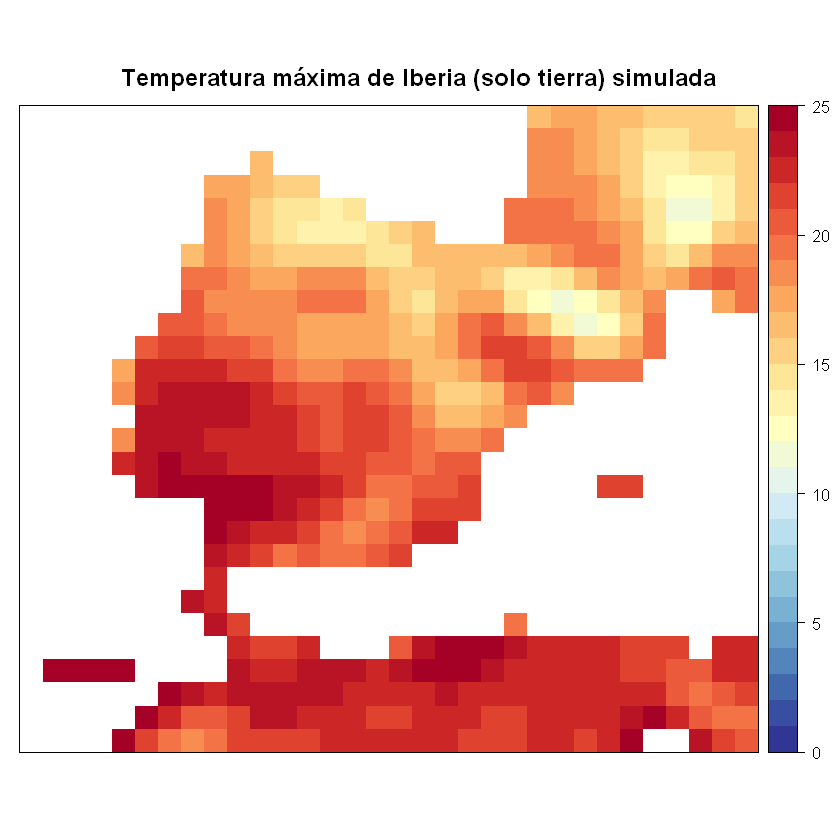

In [26]:
spatialPlot(climatology(rcm.rcp85.masked) , backdrop.theme = "coastline", rev.colors = TRUE,  
            at= seq(0,25), main= "Temperatura máxima de Iberia (solo tierra) simulada")# lo pinta en el Ecuador, donde está centrada la malla regular del modelo

In [27]:
############################################################
# *** Interpolar el modelo a la malla de la observación ****
############################################################
# Este paso lo hace automáticamente biasCorrection, pero lo hago aquí para representar el modelo en la misma malla que la observación y calcular el sesgo (bias)
rcm.rcp85.interp <- interpGrid(rcm.rcp85.masked, new.coordinates = getGrid(obs.data))

[2024-04-23 11:48:52] Calculating nearest neighbors...
[2024-04-23 11:48:52] Performing nearest interpolation... may take a while
[2024-04-23 11:48:52] Done


[2024-04-23 11:48:52] - Computing climatology...


[2024-04-23 11:48:53] - Done.
[2024-04-23 11:48:53] - Computing climatology...
[2024-04-23 11:48:53] - Done.


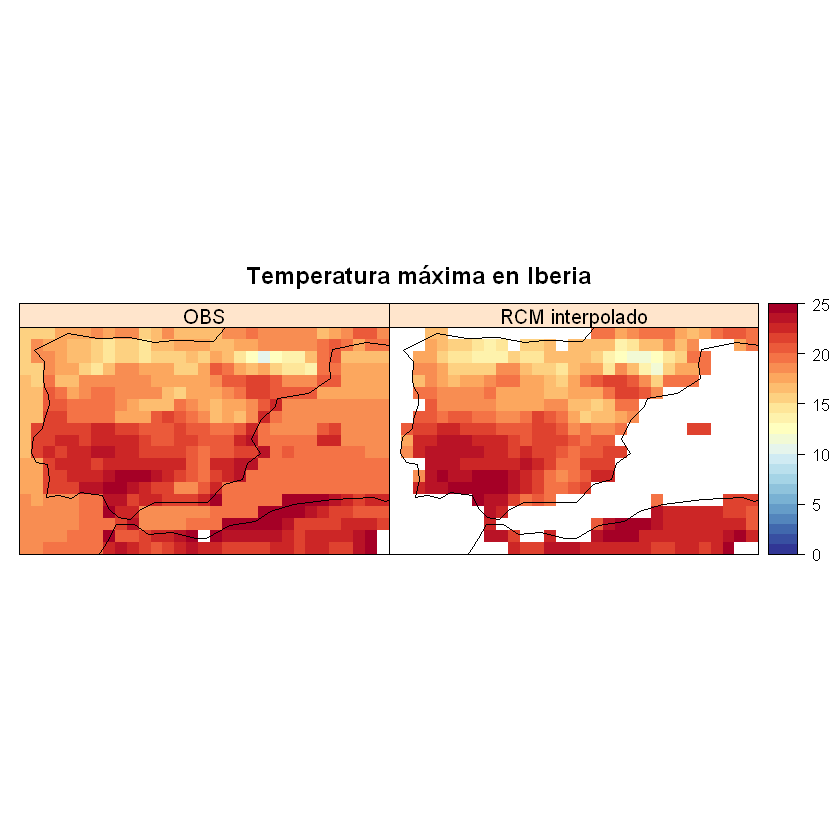

In [28]:
spatialPlot(makeMultiGrid(climatology(obs.data),climatology(rcm.rcp85.interp), skip.temporal.check = TRUE) , backdrop.theme = "coastline", 
            rev.colors = TRUE,  at= seq(0,25), main= "Temperatura máxima en Iberia", as.table=TRUE, 
            names.attr=c("OBS", "RCM interpolado"), layout=c(2,1)) # pinta ambos en las latitudes que tocan

In [29]:
##########################
# *** Bias correction ****
##########################
bc.scaling.fut <- biasCorrection(y=obs.data, x=rcm.hist.interp, newdata= rcm.rcp85.interp, precipitation = FALSE, 
                             method="scaling", scaling.type="additive" ) # correción solo de la media (aditiva para temperatura)
bc.eqm.fut <- biasCorrection(y=obs.data, x=rcm.hist.interp, newdata= rcm.rcp85.interp, precipitation = FALSE, 
                         method="eqm", extrapolation = "constant", n.quantiles=99 )  # corrección de 99 percentiles

                         
# bc.pqm.fut <- biasCorrection(y=obs.data, x=rcm.hist.interp, newdata= rcm.rcp85.interp, precipitation = FALSE, 
#                          method="pqm", extrapolation = "constant", n.quantiles=99 )  # corrección de 99 percentiles
# bc.gpqm.fut <- biasCorrection(y=obs.data, x=rcm.hist.interp, newdata= rcm.rcp85.interp, precipitation = FALSE, 
#                          method="gpqm", extrapolation = "constant", n.quantiles=99 )  # corrección de 99 percentiles

[2024-04-23 11:48:59] Trying to determine the time zone...
[2024-04-23 11:48:59] Time zone identified and set to GMT
See 'setGridDates.asPOSIXlt' to change the time zone


[2024-04-23 11:49:00] Already complete date record. Nothing was done
[2024-04-23 11:49:00] Trying to determine the time zone...
[2024-04-23 11:49:00] Time zone identified and set to GMT
See 'setGridDates.asPOSIXlt' to change the time zone
[2024-04-23 11:49:01] Already complete date record. Nothing was done
[2024-04-23 11:49:01] Trying to determine the time zone...
[2024-04-23 11:49:01] Time zone identified and set to GMT
See 'setGridDates.asPOSIXlt' to change the time zone
[2024-04-23 11:49:02] Already complete date record. Nothing was done
[2024-04-23 11:49:04] Argument precipitation is set as FALSE, please ensure that this matches your data.
[2024-04-23 11:49:06] Number of windows considered: 1...
[2024-04-23 11:49:06] Bias-correcting 1 members separately...
[2024-04-23 11:49:10] Done.
[2024-04-23 11:49:10] Trying to determine the time zone...
[2024-04-23 11:49:10] Time zone identified and set to GMT
See 'setGridDates.asPOSIXlt' to change the time zone
[2024-04-23 11:49:11] Already c

In [31]:
# Calcular el sesgo de los datos sin corregir (raw) y de las dos correcciones en la media
bias.raw.mean.fut <- gridArithmetics(climatology(rcm.rcp85.interp), climatology(rcm.hist.interp), operator="-")
bias.scaling.mean.fut <- gridArithmetics(climatology(bc.scaling.fut), climatology(bc.scaling.hist), operator="-")
bias.eqm.mean.fut <- gridArithmetics(climatology(bc.eqm.fut), climatology(bc.eqm.hist), operator="-")
# bias.pqm.mean.fut <- gridArithmetics(climatology(bc.pqm.fut), climatology(rcm.hist.interp), operator="-")
# bias.gpqm.mean.fut <- gridArithmetics(climatology(bc.gpqm.fut), climatology(rcm.hist.interp), operator="-")

[2024-04-23 11:49:38] - Computing climatology...
[2024-04-23 11:49:38] - Done.
[2024-04-23 11:49:38] - Computing climatology...
[2024-04-23 11:49:38] - Done.
[2024-04-23 11:49:38] - Computing climatology...
[2024-04-23 11:49:38] - Done.
[2024-04-23 11:49:38] - Computing climatology...
[2024-04-23 11:49:38] - Done.
[2024-04-23 11:49:38] - Computing climatology...
[2024-04-23 11:49:38] - Done.
[2024-04-23 11:49:39] - Computing climatology...
[2024-04-23 11:49:39] - Done.


In [52]:
# # Calcular el sesgo de los datos sin corregir (raw) y de las dos correcciones en la media
# bias.raw.mean <- gridArithmetics(climatology(rcm.rcp85.interp), climatology(obs.data), operator="-")
# bias.scaling.mean <- gridArithmetics(climatology(bc.scaling), climatology(obs.data), operator="-")
# bias.eqm.mean <- gridArithmetics(climatology(bc.eqm), climatology(obs.data), operator="-")
# bias.pqm.mean <- gridArithmetics(climatology(bc.pqm), climatology(obs.data), operator="-")
# bias.gpqm.mean <- gridArithmetics(climatology(bc.gpqm), climatology(obs.data), operator="-")

[2024-04-08 13:33:05] - Computing climatology...
[2024-04-08 13:33:05] - Done.
[2024-04-08 13:33:05] - Computing climatology...
[2024-04-08 13:33:05] - Done.
[2024-04-08 13:33:06] - Computing climatology...
[2024-04-08 13:33:06] - Done.
[2024-04-08 13:33:06] - Computing climatology...
[2024-04-08 13:33:06] - Done.
[2024-04-08 13:33:07] - Computing climatology...
[2024-04-08 13:33:07] - Done.
[2024-04-08 13:33:07] - Computing climatology...
[2024-04-08 13:33:07] - Done.
[2024-04-08 13:33:07] - Computing climatology...
[2024-04-08 13:33:07] - Done.
[2024-04-08 13:33:08] - Computing climatology...
[2024-04-08 13:33:08] - Done.
[2024-04-08 13:33:08] - Computing climatology...
[2024-04-08 13:33:09] - Done.
[2024-04-08 13:33:09] - Computing climatology...
[2024-04-08 13:33:09] - Done.


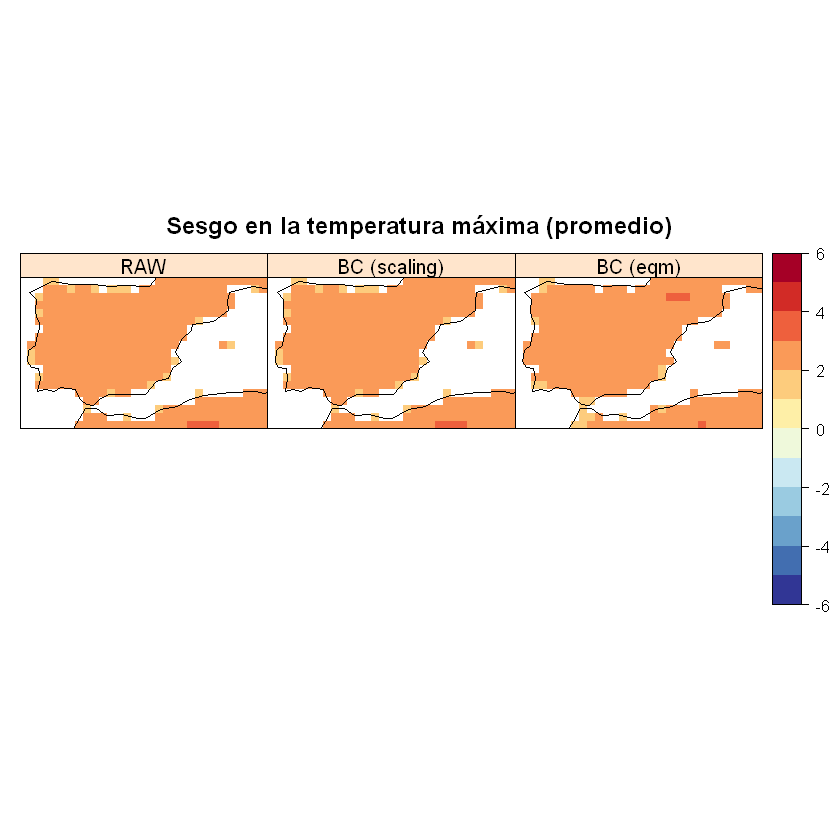

In [32]:
spatialPlot(makeMultiGrid(bias.raw.mean.fut, bias.scaling.mean.fut, bias.eqm.mean.fut), backdrop.theme = "coastline", 
            rev.colors = TRUE,  at= seq(-6,6), main= "Sesgo en la temperatura máxima (promedio)", layout=c(3,2),
            as.table=TRUE, names.attr=c("RAW", "BC (scaling)", "BC (eqm)"))

[2024-04-08 13:24:38] - Computing climatology...
[2024-04-08 13:24:38] - Done.


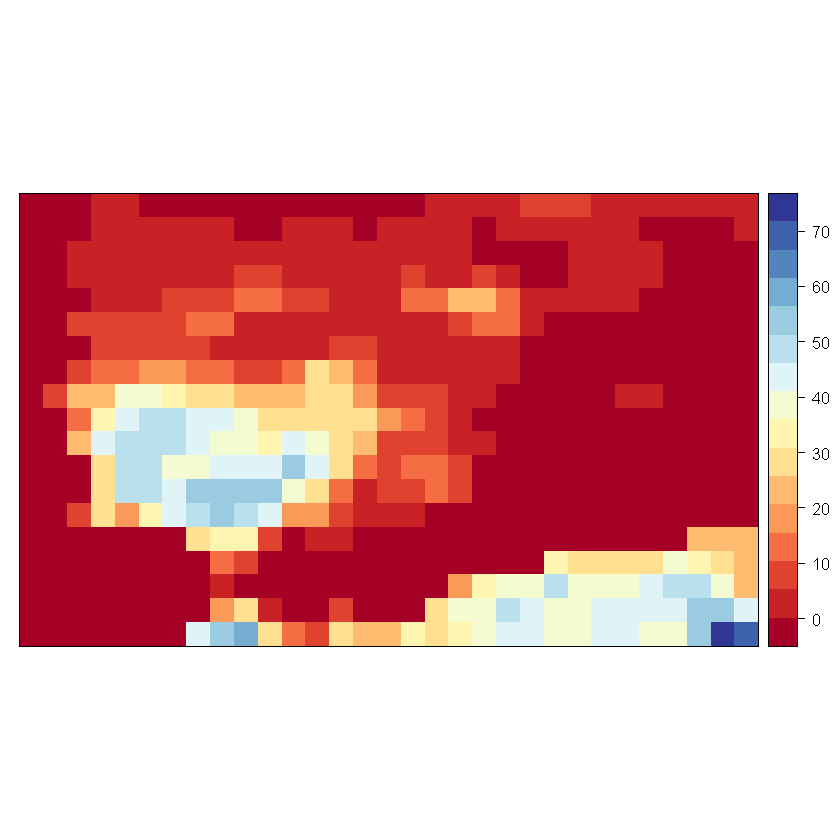

In [50]:
spatialPlot(climatology(raw.tx35))

In [55]:
# calcular el sesgo de ambos en el número de días por encima de 35 grados, año a año
obs.tx35 <- indexGrid(tx = obs.data, time.resolution = "year", index.code = "TXth", th=35)
raw.tx35 <- indexGrid(tx = rcm.rcp85.interp, time.resolution = "year", index.code = "TXth", th=35)
# por alguna razón biasCorrection devuelve fechas en un formato distinto y no le gustan a indexGrid (hago un apaño)
bc.scaling$Dates <- rcm.rcp85.interp$Dates
bc.eqm$Dates <- rcm.rcp85.interp$Dates
bc.pqm$Dates <- rcm.rcp85.interp$Dates
bc.gpqm$Dates <- rcm.rcp85.interp$Dates
bc.scaling.tx35 <- indexGrid(tx = bc.scaling, time.resolution = "year", index.code = "TXth", th=35)
bc.eqm.tx35 <- indexGrid(tx = bc.eqm, time.resolution = "year", index.code = "TXth", th=35)
bc.pqm.tx35 <- indexGrid(tx = bc.pqm, time.resolution = "year", index.code = "TXth", th=35)
bc.gpqm.tx35 <- indexGrid(tx = bc.gpqm, time.resolution = "year", index.code = "TXth", th=35)

[2024-04-08 13:34:05] Calculating TXth ...
[2024-04-08 13:34:05] Done
[2024-04-08 13:34:06] Calculating TXth ...
[2024-04-08 13:34:07] Done
[2024-04-08 13:34:08] Calculating TXth ...
[2024-04-08 13:34:09] Done
[2024-04-08 13:34:09] Calculating TXth ...
[2024-04-08 13:34:10] Done
[2024-04-08 13:34:11] Calculating TXth ...
[2024-04-08 13:34:12] Done
[2024-04-08 13:34:12] Calculating TXth ...
[2024-04-08 13:34:14] Done


In [56]:
bias.raw.tx35 <- gridArithmetics(climatology(raw.tx35), climatology(obs.tx35), operator="-")
bias.scaling.tx35 <- gridArithmetics(climatology(bc.scaling.tx35), climatology(obs.tx35), operator="-")
bias.eqm.tx35 <- gridArithmetics(climatology(bc.eqm.tx35), climatology(obs.tx35), operator="-")
bias.pqm.tx35 <- gridArithmetics(climatology(bc.pqm.tx35), climatology(obs.tx35), operator="-")
bias.gpqm.tx35 <- gridArithmetics(climatology(bc.gpqm.tx35), climatology(obs.tx35), operator="-")

[2024-04-08 13:34:15] - Computing climatology...
[2024-04-08 13:34:15] - Done.
[2024-04-08 13:34:15] - Computing climatology...
[2024-04-08 13:34:15] - Done.


[2024-04-08 13:34:15] - Computing climatology...
[2024-04-08 13:34:15] - Done.
[2024-04-08 13:34:15] - Computing climatology...
[2024-04-08 13:34:15] - Done.
[2024-04-08 13:34:15] - Computing climatology...
[2024-04-08 13:34:15] - Done.
[2024-04-08 13:34:15] - Computing climatology...
[2024-04-08 13:34:15] - Done.
[2024-04-08 13:34:15] - Computing climatology...
[2024-04-08 13:34:15] - Done.
[2024-04-08 13:34:15] - Computing climatology...
[2024-04-08 13:34:15] - Done.
[2024-04-08 13:34:15] - Computing climatology...
[2024-04-08 13:34:15] - Done.
[2024-04-08 13:34:15] - Computing climatology...
[2024-04-08 13:34:15] - Done.


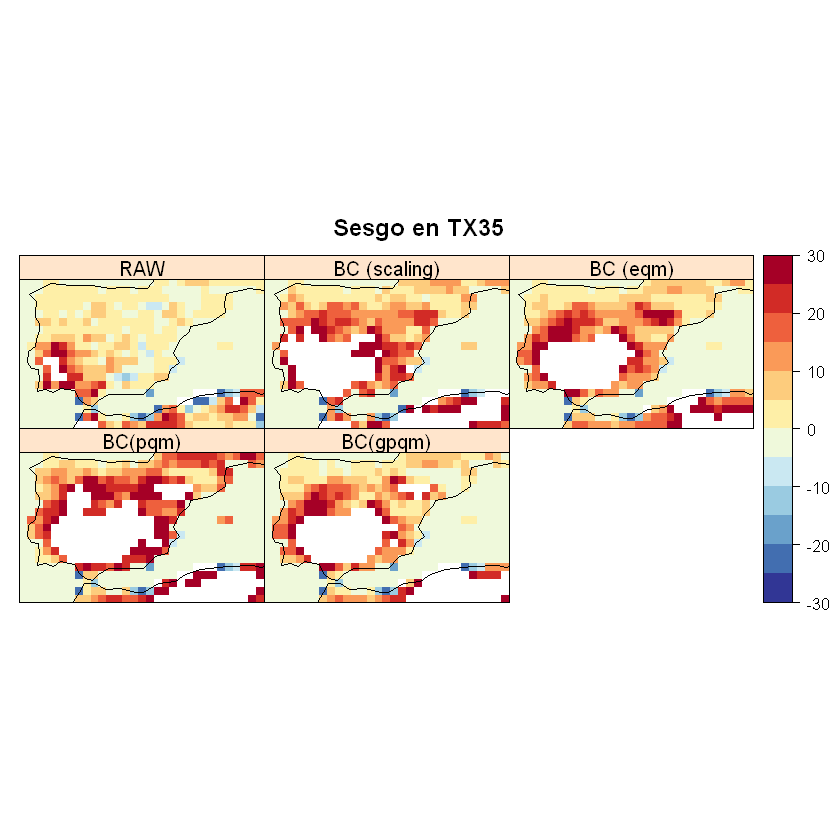

In [59]:
spatialPlot(makeMultiGrid(bias.raw.tx35, bias.scaling.tx35, bias.eqm.tx35, bias.pqm.tx35, bias.gpqm.tx35), backdrop.theme = "coastline", 
            rev.colors = TRUE,  at= seq(-30,30,5), main= "Sesgo en TX35", layout=c(3,2),
            as.table=TRUE, names.attr=c("RAW", "BC (scaling)", "BC (eqm)", "BC(pqm)", "BC(gpqm)"))

In [21]:
#####################################
# *** Rutas de datos para python ****
#####################################
# Ruta de observaciones
#"https://data.meteo.unican.es/thredds/dodsC/mirrors/W5E5/w5e5_20210705"
# Ruta de RCM simulación histórica
#"https://data.meteo.unican.es/thredds/dodsC/esgf/replica/temporal/CORDEX/output/EUR-44/KNMI/ICHEC-EC-EARTH/historical/r1i1p1/RACMO22E/v1/day/v20140304/CORDEX_output_EUR-44_KNMI_ICHEC-EC-EARTH_historical_r1i1p1_RACMO22E_v1_day_tasmax_v20140304.ncml"
# Ruta de land fraction
#"https://data.meteo.unican.es/thredds/dodsC/esgf/replica/temporal/CORDEX/output/EUR-44/KNMI/ICHEC-EC-EARTH/historical/r1i1p1/RACMO22E/v1/fx/v20140207/CORDEX_output_EUR-44_KNMI_ICHEC-EC-EARTH_historical_r1i1p1_RACMO22E_v1_fx_sftlf_v20140207.ncml"
# Ruta de RCM simulación de futuro
# "https://data.meteo.unican.es/thredds/dodsC/esgf/replica/temporal/CORDEX/output/EUR-44/KNMI/ICHEC-EC-EARTH/rcp85/r1i1p1/RACMO22E/v1/day/v20140304/CORDEX_output_EUR-44_KNMI_ICHEC-EC-EARTH_rcp85_r1i1p1_RACMO22E_v1_day_tasmax_v20140304.ncml"
